<a href="https://colab.research.google.com/github/jane-hung/fastai-v3/blob/master/wedding_dress_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wedding Dress Prediction

Jane Hung  
21 November 2019

In [0]:
from fastai.vision import *

### Create directory and upload urls file into your server

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [47]:
!pip install google_images_download

In [48]:
!wget https://chromedriver.storage.googleapis.com/78.0.3904.70/chromedriver_mac64.zip

--2019-11-21 18:40:08--  https://chromedriver.storage.googleapis.com/78.0.3904.70/chromedriver_mac64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c08::80
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7488025 (7.1M) [application/zip]
Saving to: ‘chromedriver_mac64.zip.1’

chromedriver_mac64. 100%[===================>]   7.14M  --.-KB/s    in 0.1s    

2019-11-21 18:40:08 (69.1 MB/s) - ‘chromedriver_mac64.zip.1’ saved [7488025/7488025]



In [49]:
!pwd

/content


In [50]:
Path('/content').ls()

[PosixPath('/content/.config'),
 PosixPath('/content/chromedriver'),
 PosixPath('/content/chromedriver_mac64.zip.1'),
 PosixPath('/content/chromedriver_mac64.zip'),
 PosixPath('/content/fastai'),
 PosixPath('/content/sample_data')]

In [51]:
!unzip /content/chromedriver_mac64.zip

Archive:  /content/chromedriver_mac64.zip
replace chromedriver? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [52]:
Path('/content').ls()

[PosixPath('/content/.config'),
 PosixPath('/content/chromedriver'),
 PosixPath('/content/chromedriver_mac64.zip.1'),
 PosixPath('/content/chromedriver_mac64.zip'),
 PosixPath('/content/fastai'),
 PosixPath('/content/sample_data')]

In [53]:
# install chromium, its driver, and selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome('chromedriver',options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results

Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Fetched 256 kB in 2s (162 kB/s)
Reading package lists... Done
Reading package lists... Done
B

In [54]:
folder = 'alexandragrecco'
!googleimagesdownload -k "alexandra grecco" -s medium -l 500 -o fastai/courses/dl1/data/weddingdress -i train/alexandragrecco --chromedriver chromedriver


Item no.: 1 --> Item name = alexandra grecco
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.alexandra-grecco-dt.jpg
Completed Image ====> 2.50225.jpg
Invalid or missing image format. Skipping...
Invalid or missing image format. Skipping...
Completed Image ====> 3.50224.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 4.AG_Lana_Front-01045.jpg
Completed Image ====> 5.ColetteFront.jpg
Completed Image ====> 6.LorenFront.jpg
Completed Image ====> 7.650x.jpg
Completed Image ====> 8.AlexandraGrecco_MoonStone_Look2_049-c20a1018e4d24714829353caee39acec.jpg
Completed Image ====> 9.Alexandra-Grecco-2018-Wedding-Dress-1.jpg
Completed Image ====> 10.WrenCapeFront.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 11.ag.jpeg
URLError on an image...trying next one... Error: HTTP Error 404: Not Found
Completed Image ====> 12.AG_Stevie_Front-01089.jpg
Completed Image 

In [55]:
Path('/content').ls()

[PosixPath('/content/.config'),
 PosixPath('/content/chromedriver'),
 PosixPath('/content/chromedriver_mac64.zip.1'),
 PosixPath('/content/chromedriver_mac64.zip'),
 PosixPath('/content/fastai'),
 PosixPath('/content/sample_data')]

In [56]:
folder = 'madewithlove'
!googleimagesdownload -k "made with love bridal" -s medium -l 500 -o fastai/courses/dl1/data/weddingdress -i train/madewithlove -cd chromedriver


Item no.: 1 --> Item name = made with love bridal
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.Designer-Made-With-Love.jpg
Completed Image ====> 2.made-with-love-dt.jpg
Completed Image ====> 3.29e7e44d2e6f2e7615ad8c78dc71e254.jpg
Completed Image ====> 4.Made-with-Love-Bridal-Gown-Sienna-front.jpg
Completed Image ====> 5.fa65cad257334fab497292e39effb69b.jpg
Completed Image ====> 6.made-with-love-bridal-gowns-main032019.jpg
Completed Image ====> 7.06-made-with-love-bridal-luxe-ella.jpg
Completed Image ====> 8.458c343d900875b6190bc0ba2a0643fd.jpg
Completed Image ====> 9.Made-With-Love-harper-CT.jpeg
Completed Image ====> 10.Made-With-Love-Danni-CT.jpeg
Completed Image ====> 11.Made-with-Love-Bridal-Gown-Carla-front.jpg
Completed Image ====> 12.Sienna4-1.jpg
Completed Image ====> 13.650x.jpg
Completed Image ====> 14.made-with-love-tommy-overskirt-wide-1000x667.jpg
Completed Image ====> 15.Made-w

In [57]:
folder = 'taralauren'
!googleimagesdownload -k "tara lauren" -s medium -l 500 -o fastai/courses/dl1/data/weddingdress -i train/taralauren -cd chromedriver


Item no.: 1 --> Item name = tara lauren
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.5bfc656e71c31e2e4c33a1d8__tara-lauren-2019-half-tile.jpg
Completed Image ====> 2.Tara-Lauren_Giuletta_Front-02363.jpg
Completed Image ====> 3.Tara-Lauren_Isolde_Front-02364.jpg
Completed Image ====> 4.Sultana-Front-500x750.jpg
Completed Image ====> 5.Maya-Front-500x750.jpg
Completed Image ====> 6.Love-and-Lace-New-Designer-Tara-Lauren-Cover-880x820.jpg
Completed Image ====> 7.efd28092dfaaadd5b3399445cfb48704.jpg
Completed Image ====> 8.650x.jpg
Invalid or missing image format. Skipping...
Completed Image ====> 9.Lucia-Front-500x750.jpg
Completed Image ====> 10.Dawson-Front-500x750.jpg
Completed Image ====> 11.5bfc6a0698ce0652224fd30d__tara-lauren-2018-clarke-640-960.jpg
Completed Image ====> 12.Sienna-Skirt-Front-500x750.jpg
Completed Image ====> 13.a29d48f06b563b448c97c920edbd2f99_1024x1024.jpg
Completed Im

In [58]:
folder = 'loverssociety'
!googleimagesdownload -k "lovers society" -s medium -l 500 -o fastai/courses/dl1/data/weddingdress -i train/loverssociety --chromedriver chromedriver


Item no.: 1 --> Item name = lovers society
Evaluating...
Getting you a lot of images. This may take a few moments...
Reached end of Page.
Starting Download...
Completed Image ====> 1.REEF.jpg
Completed Image ====> 2.designers-page-slider-lovers-society-beckett.jpg
Completed Image ====> 3.designers-page-slider-lovers-society-levi.jpg
Completed Image ====> 4.650x.jpg
Completed Image ====> 5.designers-page-slider-lovers-society-byron.jpg
Completed Image ====> 6.650x.jpg
Completed Image ====> 7.DREW.jpg
Completed Image ====> 8.650x.jpg
Completed Image ====> 9.61845b046dcf7daeba16872f300d61f4.png
Completed Image ====> 10.Lovers-Society_Tate_Back-01335.jpg
Completed Image ====> 11.a5yvke97d8a21.jpg
Completed Image ====> 12.Lovers-Society-Wyatt.jpg
Completed Image ====> 13.584545dcd4de06298f0f5844ebc907e5.jpg
Completed Image ====> 14.Screen+Shot+2019-07-12+at+1.13.41+pm.png
Completed Image ====> 15.WYATT.jpg
Completed Image ====> 16.lovers-society-rosa-veil-576x864.jpg
URLError on an image..

You will need to run this cell once per each category.

In [0]:
path = Path('/content/fastai/courses/dl1/data/weddingdress')

## View data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [62]:
data.classes

['alexandragrecco', 'loverssociety', 'madewithlove', 'taralauren']

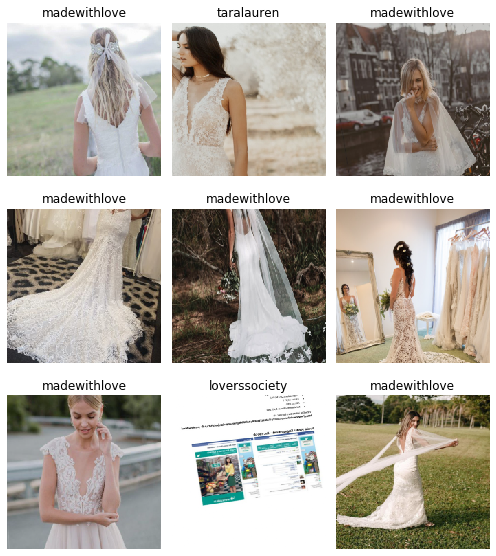

In [63]:
data.show_batch(rows=3, figsize=(7,8))

In [64]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['alexandragrecco', 'loverssociety', 'madewithlove', 'taralauren'],
 4,
 1820,
 454)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [66]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time


OSError: ignored

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

In [0]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_confusion_matrix()

In [0]:
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [0]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .split_none()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

Then we create a new learner to use our new databunch with all the images.

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)


If the code above does not show any GUI(contains images and buttons) rendered by widgets but only text output, that may caused by the configuration problem of ipywidgets. Try the solution in this [link](https://github.com/fastai/fastai/issues/1539#issuecomment-505999861) to solve it.


Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, losing all the results from cleaning the data from toplosses.

In [0]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
ImageCleaner(ds, idxs, path, duplicates=True)

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [0]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [0]:
defaults.device = torch.device('cpu')

In [0]:
img = open_image(path/'black'/'00000021.jpg')
img

We create our `Learner` in production enviromnent like this, just make sure that `path` contains the file 'export.pkl' from before.

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(1, max_lr=0.5)

### Learning rate (LR) too low

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [0]:
learn.fit_one_cycle(5, max_lr=1e-5)

In [0]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [0]:
learn.fit_one_cycle(1)

### Too many epochs

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [0]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))